In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/amazon_orders.csv")

In [3]:
df.head()

,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,SellerID
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,0.00,0.00,0.09,319.86,Debit Card,Delivered,Washington,DC,India,SELL01967
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,0.05,19.10,1.74,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,0.10,7.57,5.91,108.06,Debit Card,Delivered,Austin,TX,United States,SELL00908
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,0.15,11.42,5.53,159.66,Cash on Delivery,Delivered,Charlotte,NC,India,SELL01164
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,0.25,38.67,9.23,821.36,Credit Card,Cancelled,San Antonio,TX,Canada,SELL01411


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   OrderID        100000 non-null  object 
 1   OrderDate      100000 non-null  object 
 2   CustomerID     100000 non-null  object 
 3   CustomerName   100000 non-null  object 
 4   ProductID      100000 non-null  object 
 5   ProductName    100000 non-null  object 
 6   Category       100000 non-null  object 
 7   Brand          100000 non-null  object 
 8   Quantity       100000 non-null  int64  
 9   UnitPrice      100000 non-null  float64
 10  Discount       100000 non-null  float64
 11  Tax            100000 non-null  float64
 12  ShippingCost   100000 non-null  float64
 13  TotalAmount    100000 non-null  float64
 14  PaymentMethod  100000 non-null  object 
 15  OrderStatus    100000 non-null  object 
 16  City           100000 non-null  object 
 17  State          100000 non-null

In [5]:
df["OrderDate"] = pd.to_datetime(df["OrderDate"], errors="coerce")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   OrderID        100000 non-null  object        
 1   OrderDate      100000 non-null  datetime64[ns]
 2   CustomerID     100000 non-null  object        
 3   CustomerName   100000 non-null  object        
 4   ProductID      100000 non-null  object        
 5   ProductName    100000 non-null  object        
 6   Category       100000 non-null  object        
 7   Brand          100000 non-null  object        
 8   Quantity       100000 non-null  int64         
 9   UnitPrice      100000 non-null  float64       
 10  Discount       100000 non-null  float64       
 11  Tax            100000 non-null  float64       
 12  ShippingCost   100000 non-null  float64       
 13  TotalAmount    100000 non-null  float64       
 14  PaymentMethod  100000 non-null  object        
 15  O

In [7]:
df["Year_Month"] = df["OrderDate"].dt.to_period("M").astype(str)

In [8]:
df[["OrderDate","Year_Month"]].head()

,OrderDate,Year_Month
0,2023-01-31,2023-01
1,2023-12-30,2023-12
2,2022-05-10,2022-05
3,2023-07-18,2023-07
4,2023-02-04,2023-02


In [9]:
df_valid = df[df["OrderStatus"].isin(["Delivered", "Shipped"])].copy()

In [10]:
df_valid["OrderStatus"].value_counts()

OrderStatus
Delivered    74628
Shipped      15192
Name: count, dtype: int64

In [11]:
monthly_revenue = (
    df_valid
    .groupby("Year_Month", as_index=False)["TotalAmount"]
    .sum()
    .rename(columns={"TotalAmount":"MonthlyRevenue"})
    .sort_values("Year_Month")
)

In [12]:
monthly_revenue.head()

,Year_Month,MonthlyRevenue
0,2020-01,1457144.57
1,2020-02,1229077.58
2,2020-03,1406480.34
3,2020-04,1423935.70
4,2020-05,1395638.01


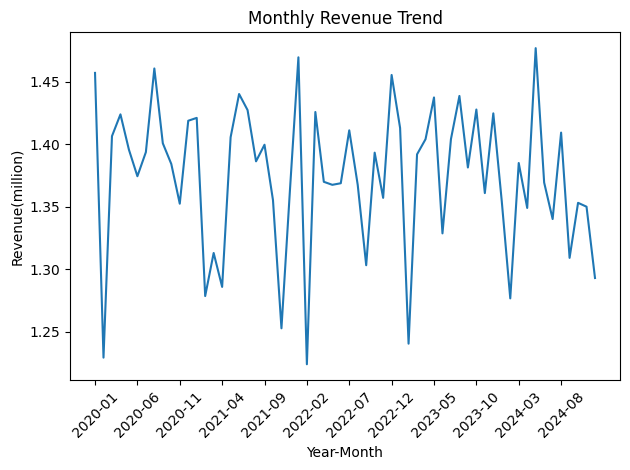

In [13]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(monthly_revenue["Year_Month"], monthly_revenue["MonthlyRevenue"]/1_000_000)

plt.xticks(
    ticks=range(0, len(monthly_revenue), 5),
    labels=monthly_revenue["Year_Month"][::5],
    rotation=45
    )

plt.title("Monthly Revenue Trend")
plt.xlabel("Year-Month")
plt.ylabel("Revenue(million)")
plt.tight_layout()
plt.show()

In [14]:
category_revenue = (
    df_valid
    .groupby("Category", as_index=False)["TotalAmount"]
    .sum()
    .rename(columns={"TotalAmount": "CategoryRevenue"})
    .sort_values("CategoryRevenue", ascending=False)
)


In [15]:
category_revenue.head()

,Category,CategoryRevenue
2,Electronics,14014488.97
4,Sports & Outdoors,13780079.42
0,Books,13754680.67
1,Clothing,13730018.54
5,Toys & Games,13601805.72


In [16]:
total_revenue = category_revenue["CategoryRevenue"].sum()

category_revenue["RevenueShare(%)"] = (
    category_revenue["CategoryRevenue"] / total_revenue * 100
)

In [17]:
category_revenue.head()

,Category,CategoryRevenue,RevenueShare(%)
2,Electronics,14014488.97,16.996261
4,Sports & Outdoors,13780079.42,16.711978
0,Books,13754680.67,16.681175
1,Clothing,13730018.54,16.651266
5,Toys & Games,13601805.72,16.495774


In [18]:
product_revenue = (
    df_valid
    .groupby("ProductName", as_index=False)["TotalAmount"]
    .sum()
    .rename(columns={"TotalAmount": "ProductRevenue"})
    .sort_values("ProductRevenue", ascending=False)
)



In [19]:
product_revenue.head(20)

,ProductName,ProductRevenue
22,LED Desk Lamp,1740803.34
13,Electric Kettle,1714974.27
44,Water Bottle,1714307.52
25,Memory Card 128GB,1713710.65
21,Kids Toy Car,1710788.46
24,Mechanical Keyboard,1710301.37
39,Smartwatch,1696428.40
27,Noise Cancelling Headphones,1692734.69
20,Jeans,1690682.16
35,Router,1690081.08


In [20]:
total_product_revenue = product_revenue["ProductRevenue"].sum()

product_revenue["RevenueShare"] = (
    product_revenue["ProductRevenue"] / total_product_revenue
)


In [21]:
product_revenue["CumulativeShare"] = product_revenue["RevenueShare"].cumsum()


In [22]:
product_revenue.head(10)

,ProductName,ProductRevenue,RevenueShare,CumulativeShare
22,LED Desk Lamp,1740803.34,0.021112,0.021112
13,Electric Kettle,1714974.27,0.020799,0.041910
44,Water Bottle,1714307.52,0.020790,0.062701
25,Memory Card 128GB,1713710.65,0.020783,0.083484
21,Kids Toy Car,1710788.46,0.020748,0.104232
24,Mechanical Keyboard,1710301.37,0.020742,0.124974
39,Smartwatch,1696428.40,0.020574,0.145548
27,Noise Cancelling Headphones,1692734.69,0.020529,0.166076
20,Jeans,1690682.16,0.020504,0.186580
35,Router,1690081.08,0.020497,0.207077


In [23]:
customer_revenue = (
    df_valid
    .groupby(["CustomerName", "CustomerID"], as_index=False)["TotalAmount"]
    .sum()
    .rename(columns={"TotalAmount": "CustomerRevenue"})
    .sort_values("CustomerRevenue", ascending=False)
)

In [24]:
customer_revenue.head(10)

,CustomerName,CustomerID,CustomerRevenue
42788,Pooja Patel,CUST010696,5436.04
39516,Neha Sharma,CUST035973,5124.43
82401,Vikas Mehta,CUST009614,5003.65
18919,Arjun Kapoor,CUST018720,4773.18
69936,Sneha Reddy,CUST008882,4730.47
46083,Priya Kapoor,CUST022031,4266.02
86133,Vivaan Kapoor,CUST031449,4253.27
19667,Arjun Kumar,CUST047013,4222.62
4910,Aditya Gupta,CUST049666,4189.02
33600,Mohit Mehta,CUST041944,4171.02


In [25]:
total_customer_revenue = customer_revenue["CustomerRevenue"].sum()

customer_revenue["RevenueShare"] = (
    customer_revenue["CustomerRevenue"] / total_customer_revenue
)

customer_revenue["CumulativeShare"] = (
    customer_revenue["RevenueShare"].cumsum()
)

In [26]:
customer_revenue.head(10)

,CustomerName,CustomerID,CustomerRevenue,RevenueShare,CumulativeShare
42788,Pooja Patel,CUST010696,5436.04,0.000066,0.000066
39516,Neha Sharma,CUST035973,5124.43,0.000062,0.000128
82401,Vikas Mehta,CUST009614,5003.65,0.000061,0.000189
18919,Arjun Kapoor,CUST018720,4773.18,0.000058,0.000247
69936,Sneha Reddy,CUST008882,4730.47,0.000057,0.000304
46083,Priya Kapoor,CUST022031,4266.02,0.000052,0.000356
86133,Vivaan Kapoor,CUST031449,4253.27,0.000052,0.000407
19667,Arjun Kumar,CUST047013,4222.62,0.000051,0.000459
4910,Aditya Gupta,CUST049666,4189.02,0.000051,0.000509
33600,Mohit Mehta,CUST041944,4171.02,0.000051,0.000560


In [27]:
analysis_date = df_valid["OrderDate"].max() + pd.Timedelta(days=1)
analysis_date


Timestamp('2024-12-30 00:00:00')

In [28]:
customer_recency = (
    df_valid
    .groupby(["CustomerID", "CustomerName"], as_index=False)["OrderDate"]
    .max()
    .rename(columns={"OrderDate": "LastPurchaseDate"})
)


In [29]:
customer_recency["Recency"] = (
    analysis_date - customer_recency["LastPurchaseDate"]
).dt.days

In [30]:
customer_recency.sort_values("Recency").head(100)

,CustomerID,CustomerName,LastPurchaseDate,Recency
46520,CUST025919,Aditya Reddy,2024-12-29,1
70234,CUST039281,Aditya Joshi,2024-12-29,1
20642,CUST011491,Rohit Verma,2024-12-29,1
49580,CUST027587,Anjali Mehta,2024-12-29,1
32279,CUST017994,Aditya Verma,2024-12-29,1
...,...,...,...,...
50510,CUST028131,Vivaan Kapoor,2024-12-28,2
74752,CUST041798,Vikas Gupta,2024-12-28,2
4736,CUST002647,Aarav Sharma,2024-12-28,2
2195,CUST001251,Pooja Reddy,2024-12-28,2


In [31]:
customer_frequency = (
    df_valid
    .groupby(["CustomerID", "CustomerName"], as_index=False)["OrderID"]
    .nunique()
    .rename(columns={"OrderID": "Frequency"})
)


In [32]:
rfm = (
    customer_recency
    .merge(customer_frequency, on=["CustomerID", "CustomerName"])
    .merge(customer_revenue, on=["CustomerID", "CustomerName"])
)


In [33]:
rfm = rfm.sort_values(
    by=["Recency", "Frequency", "CustomerRevenue"],
    ascending=[True, False, False]
)

In [34]:
rfm.head()

,CustomerID,CustomerName,LastPurchaseDate,Recency,Frequency,CustomerRevenue,RevenueShare,CumulativeShare
21123,CUST011758,Karan Joshi,2024-12-29,1,1,3431.27,0.000042,0.002834
30561,CUST017032,Vikas Sharma,2024-12-29,1,1,3329.37,0.000040,0.004590
68829,CUST038503,Sahil Patel,2024-12-29,1,1,3260.02,0.000040,0.006465
86835,CUST048585,Neha Kumar,2024-12-29,1,1,2943.94,0.000036,0.036852
12116,CUST006768,Ritika Gupta,2024-12-29,1,1,2511.85,0.000030,0.115468


In [35]:
rfm["R_Score"] = pd.qcut(
    rfm["Recency"],
    5,
    labels=[5, 4, 3, 2, 1]
)

rfm["F_Score"] = pd.qcut(
    rfm["Frequency"].rank(method="first"),
    5,
    labels=[1, 2, 3, 4, 5]
)

rfm["M_Score"] = pd.qcut(
    rfm["CustomerRevenue"],
    5,
    labels=[1, 2, 3, 4, 5]
)


rfm["RFM_Score"] = (
    rfm["R_Score"].astype(int) +
    rfm["F_Score"].astype(int) +
    rfm["M_Score"].astype(int)
)

In [36]:
rfm_sorted = rfm.sort_values(
    by=["RFM_Score", "Recency"],
    ascending=[False, True]
)

rfm_sorted.head(10)

,CustomerID,CustomerName,LastPurchaseDate,Recency,Frequency,CustomerRevenue,RevenueShare,CumulativeShare,R_Score,F_Score,M_Score,RFM_Score
64843,CUST036253,Aman Patel,2024-12-28,2,2,1997.54,0.000024,0.274215,5,5,5,15
72638,CUST040643,Vihaan Mehta,2024-12-21,9,2,1655.83,0.000020,0.412338,5,5,5,15
47181,CUST026266,Vikas Gupta,2024-12-17,13,2,1961.41,0.000024,0.286702,5,5,5,15
28134,CUST015677,Sneha Gupta,2024-12-14,16,2,3196.94,0.000039,0.010376,5,5,5,15
74918,CUST041894,Aman Patel,2024-12-06,24,2,1560.24,0.000019,0.453498,5,5,5,15
23511,CUST013106,Ritika Joshi,2024-12-04,26,2,3595.42,0.000044,0.001568,5,5,5,15
35600,CUST019826,Neha Kumar,2024-11-09,51,2,2147.22,0.000026,0.225147,5,5,5,15
43327,CUST024116,Aditya Patel,2024-11-08,52,2,2061.93,0.000025,0.252564,5,5,5,15
21800,CUST012130,Priya Verma,2024-11-07,53,2,1784.22,0.000022,0.357257,5,5,5,15
35954,CUST020019,Rohit Kumar,2024-11-04,56,2,3410.62,0.000041,0.003124,5,5,5,15


In [37]:
def segment(row):
    if row["RFM_Score"] >= 12:
        return "Champions"
    elif row["RFM_Score"] >= 9:
        return "Loyal Customers"
    elif row["RFM_Score"] >= 6:
        return "Potential"
    else:
        return "At Risk"

rfm["Segment"] = rfm.apply(segment, axis=1)

rfm["Segment"].value_counts()

Segment
Loyal Customers    53136
Potential          35939
Champions            339
Name: count, dtype: int64

In [38]:
rfm.head()

,CustomerID,CustomerName,LastPurchaseDate,Recency,Frequency,CustomerRevenue,RevenueShare,CumulativeShare,R_Score,F_Score,M_Score,RFM_Score,Segment
21123,CUST011758,Karan Joshi,2024-12-29,1,1,3431.27,0.000042,0.002834,5,1,5,11,Loyal Customers
30561,CUST017032,Vikas Sharma,2024-12-29,1,1,3329.37,0.000040,0.004590,5,1,5,11,Loyal Customers
68829,CUST038503,Sahil Patel,2024-12-29,1,1,3260.02,0.000040,0.006465,5,1,5,11,Loyal Customers
86835,CUST048585,Neha Kumar,2024-12-29,1,1,2943.94,0.000036,0.036852,5,1,5,11,Loyal Customers
12116,CUST006768,Ritika Gupta,2024-12-29,1,1,2511.85,0.000030,0.115468,5,1,5,11,Loyal Customers


In [39]:
rfm_export = rfm[[
    "CustomerID",
    "CustomerName",
    "Recency",
    "Frequency",
    "CustomerRevenue",
    "R_Score",
    "F_Score",
    "M_Score",
    "RFM_Score",
    "Segment"
]]


In [40]:
rfm.tail()


,CustomerID,CustomerName,LastPurchaseDate,Recency,Frequency,CustomerRevenue,RevenueShare,CumulativeShare,R_Score,F_Score,M_Score,RFM_Score,Segment
17568,CUST009794,Sahil Patel,2020-01-01,1825,1,72.00,8.731897e-07,0.998086,1,5,1,7,Potential
65211,CUST036454,Karan Kapoor,2020-01-01,1825,1,57.98,7.031603e-07,0.998766,1,5,1,7,Potential
30803,CUST017162,Sneha Mehta,2020-01-01,1825,1,34.02,4.125821e-07,0.999613,1,5,1,7,Potential
71575,CUST040039,Pooja Patel,2020-01-01,1825,1,27.96,3.390887e-07,0.999779,1,5,1,7,Potential
88015,CUST049244,Sahil Singh,2020-01-01,1825,1,25.68,3.114377e-07,0.999827,1,5,1,7,Potential
